In [135]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [136]:
os.listdir(u'/Users/camilogarciatorres/Documents/GitHub/Taller1')

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 'data',
 'output',
 'Taller1.ipynb',
 'Untitled.ipynb']

In [137]:
pwd


'/Users/camilogarciatorres/Documents/GitHub/Taller1'

In [138]:
base_dir = os.path.join( '.','data')
ciudad = 'Medellin'
fuente = 'NREL'
union = os.path.join(base_dir,ciudad,fuente+'.csv')
serieREL= pd.read_csv(union, sep = ';',
                encoding='latin-1')

base_dir2 = os.path.join( '.','data')
ciudad2 = 'Medellin'
fuente2 = 'IDEAM'
union2 = os.path.join(base_dir2,ciudad2,fuente2+'.csv')
serieIDEAM = pd.read_csv(union2, sep = ';',
                encoding='latin-1')


## Punto 1 ##

La idea de este punto es implementara una funcion que calcule la enficc al 99% con entrada una serie de 10 años.

In [139]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [148]:
def enficc(serie10):
    ghi_mensual_loc = ghi_mensual(serie10)
    ghi_diario_loc = ghi_dia(ghi_mensual_loc)
    percentil = 0.01
    enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
    return print('La ENFICC 99% es: ', enficc)
    

In [149]:
e=enficc(serieIDEAM)
e

La ENFICC 99% es:  3.53519358791


## PUNTO 2 ##

La idea de este punto es crear una funcion que grafica la distribucion de energia. La entrada corresponde a las diferentes series de 10 años en resolución horaria y la salida debe una gráfica.

In [156]:
def graficade(serieagraficar):

    ghi_mensual_loc = ghi_mensual(serieagraficar)
    ghi_diario_loc = ghi_dia(ghi_mensual_loc)
    datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    numdatos = range(len(datos_IDEAM))
    pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
    pylab.legend(loc='upper left')
    pylab.savefig(os.path.join(u'/Users/camilogarciatorres/Documents/GitHub','medellin_IDEAM.png'), dpi=600)
    
    return pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')

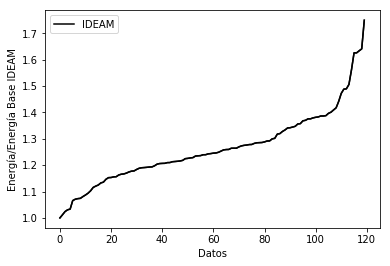

In [157]:
graficade(serieIDEAM)

## Punto 3 ##

Este punto busca implementar una función para la Metodología Medición-Correlación-Predicción (MCP). La entrada a la función es la serie de corto plazo medida en sitio (OBJ) y la serie secundaría basada en información satelital correspondiente a 10 años de medición (REF). La salida debe corresponder a la serie de largo plazo (10 año, resolución horaria) ajustada siguiendo la metodología MCP.

In [ ]:
serieIDEAM.dtypes

In [ ]:
mediay=serieIDEAM['IDEAM'].mean()
sigmay=serieIDEAM['IDEAM'].std()

In [ ]:
def MCP(mediax, mediay, sigmax, sigmay, x):
    return ((mediay-(sigmay/sigmax)*mediax)+(sigmay/sigmax)*x)

def pedazodedataframe(year1, year2, mes1, mes2, dia1, dia2,  serieIDEAM1):
    for year in range(year1,year2):
        for mes in range(mes1,mes2):
            for dia in range(dia1,dia2):
                listafinal= pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHIdia"])
                ghi_diario = serieIDEAM1.loc[(
                            (serieIDEAMl["AÑO"] == year)
                            & (serieIDEAM1["MES"] == mes))
                               "NREL"].item()
                ghi_dict = {"AÑO":agno, "MES":mes, "DIAs":dia,
                        "GHImes":ghi_diario}
                
                listafinal = listafinal.append(ghi_dict, ignore_index=True)
    return ghi_df



In [ ]:
def pedazodedataframe(year1, year2, mes1, mes2, dia1, dia2, serieIDEAM1):
    
    pedazo= serieIDEAM1[(serieIDEAM1['AÑO']>=year1) & (serieIDEAM1['AÑO']<=year2)
                      & (serieIDEAM1['MES']>=mes1)& (serieIDEAM1['MES']<=mes2)
                      & (serieIDEAM1['DIA']>=dia1)& (serieIDEAM1['DIA']<=dia2)]

    return pedazo

In [ ]:
z= serieIDEAM[(serieIDEAM['AÑO']>=2006) & (serieIDEAM['AÑO']<=2006)]

In [ ]:
x=pedazodedataframe(2005, 2005, 1, 1, 1, 30,serieIDEAM)
x

In [145]:
def listaajustada(larga, corta):
    
    pedazolarga=larga[(larga['AÑO']>=corta.iloc[0,0]) & (larga['AÑO']<=corta.iloc[-1,0])]
    sigmax1=pedazolarga['NREL'].std()
    mediax1=pedazolarga['NREL'].mean()
    mediax2=corta['IDEAM'].mean()
    sigmax2=corta['IDEAM'].std()
    
    correccion=MCP(mediax1, mediax2, sigmax1, sigmax2, larga)
    x=(correccion['NREL'])
    x[x<0]=0
    listafinal=serieREL.copy()
    del listafinal['NREL']
    listafinal['NREL']=x
    
    return listafinal
    
                                     #return listafinal

In [158]:
y=listaajustada(serieREL, z)
y.head()

,AÑO,MES,DIA,HORA,NREL
0,2005,1,1,0,0.0
1,2005,1,1,1,0.0
2,2005,1,1,2,0.0
3,2005,1,1,3,0.0
4,2005,1,1,4,0.0


## PUNTO 4 ##

La idea de este punto es implementar funciones para el cálculo de los indicadores de error. Cada error tiene su funcion: error RMS (RMSEn), error de sesgo medio (MBE) y Indice de Kolmogorov-Smagorinski (KSI%). La entrada a estas funciones son dos series de largo plazo (10 años y resolución horaria) y la salida el indicador de error dado.

In [ ]:
def MB(satelite, tierra):
    satelitecorta=satelite[(satelite['AÑO']>=tierra.iloc[0,0]) & (satelite['AÑO']<=tierra.iloc[-1,0])]
    numdatos = len(satelitecorta)
    x=(satelitecorta['NREL']-tierra['IDEAM']).sum()/numdatos
    mb=x/(tierra['IDEAM'].sum()*numdatos)
    
    return mb

In [ ]:
def KSI(satelite, tierra):
    satelitecorta=satelite[(satelite['AÑO']>=tierra.iloc[0,0]) & (satelite['AÑO']<=tierra.iloc[-1,0])]
    calculos=stats.ks_2samp(satelitecorta['NREL'], tierra['IDEAM'])
    x=('El error KSI', calculos[0],'y el p value es igual a', calculos[1])
    
    return print(x)

In [ ]:
def RMSEn(satelite, tierra):
    satelitecorta=satelite[(satelite['AÑO']>=tierra.iloc[0,0]) & (satelite['AÑO']<=tierra.iloc[-1,0])]
    energiasatelite = satelite['NREL']
    energiatierra = tierra['IDEAM']
    numdatos = len(energiasatelite)
    
    x=(((energiasatelite-energiatierra)**2).sum()/numdatos)**(1/2)
    rmsen=x/(numdatos*energiatierra.sum())
    
    return rmsen
    

## PUNTO 5##

In [ ]:
ghi_mensual_loc = ghi_mensual(serieIDEAM)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])

ghi_mensual_loc = ghi_mensual(serieREL)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_NREL = sorted(ghi_diario_loc["GHIdiario"])


NREL2=listaajustada(serieREL, z)
ghi_mensual_loc = ghi_mensual(NREL2)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_NREL2 = sorted(ghi_diario_loc["GHIdiario"])

In [ ]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatos = range(len(datos_IDEAM))
numdatos2 = range(len(datos_NREL))
numdatos3 = range(len(datos_NREL2))

pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.legend(loc='upper left')
pylab.plot(numdatos2,datos_NREL/datos_IDEAM[0], label='NREL')
pylab.legend(loc='upper left')
pylab.plot(numdatos3,datos_NREL2/datos_IDEAM[0], label='NRELM')
pylab.legend(loc='upper left')